# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [185]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [186]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [187]:
#  1. Get the total rides for each city type
Total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [188]:
# 2. Get the total drivers for each city type
Total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
Total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [189]:
#  3. Get the total amount of fares for each city type

Total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
Total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [190]:
#  4. Get the average fare per ride for each city type. 
Average_Fare_per_Ride=pyber_data_df.groupby(["type"]).mean()["fare"]
Average_Fare_per_Ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [191]:
# 5. Get the average fare per driver for each city type. 


Average_Fare_per_Driver=Sum_of_fares/driver_total
Average_Fare_per_Driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [192]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
          "Total_rides" : Total_rides,
          "Total_drivers": Total_drivers,
          "Total_fares": Total_fares,
          "Average_Fare_per_Ride": Average_Fare_per_Ride,
          "Average_Fare_per_Driver": Average_Fare_per_Driver})
pyber_summary_df

,Total_rides,Total_drivers,Total_fares,Average_Fare_per_Ride,Average_Fare_per_Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [193]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total_rides,Total_drivers,Total_fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [194]:
#  8. Format the columns.
pyber_summary_df["Total_rides"] = pyber_summary_df["Total_rides"].map("{:.0f}".format)

pyber_summary_df["Total_drivers"] = pyber_summary_df["Total_drivers"].map("{:.0f}".format)

pyber_summary_df["Total_fares"] = pyber_summary_df["Total_fares"].map("${:.2f}".format)

pyber_summary_df["Average_Fare_per_Ride"] = pyber_summary_df["Average_Fare_per_Ride"].map("${:.2f}".format)

pyber_summary_df["Average_Fare_per_Driver"] = pyber_summary_df["Average_Fare_per_Driver"].map("${:.2f}".format)

pyber_summary_df

,Total_rides,Total_drivers,Total_fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [195]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [196]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares=pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_of_fares

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [197]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df= sum_of_fares.reset_index()
pyber_data_df


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [227]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivottable = pd.pivot_table(data=pyber_data_df,index='date',values='fare',columns='type')
pivottable

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [228]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

Fare_by_date=pivottable.loc['2019-01-01':'2019-04-29']
# pyber_data_df.groupby(["type","date"]).sum()["fare"]
# Fare_by_date= Fare_by_date.sort_values(["date"], ascending='true')
Fare_by_date


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [229]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.


Fare_by_date.index = pd.to_datetime(Fare_by_date.index)
Fare_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [230]:
# 7. Check that the datatype for the index is datetime using df.info()
Fare_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [231]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Fare_by_weeks=Fare_by_date.resample('W').sum()




In [232]:
Fare_by_date.resample('M').sum()

type,Rural,Suburban,Urban
date,,,
2019-01-31,940.00,4796.08,9054.33
2019-02-28,919.17,4442.70,8875.99
2019-03-31,877.50,4341.99,9845.95
2019-04-30,1177.02,4302.57,9289.51


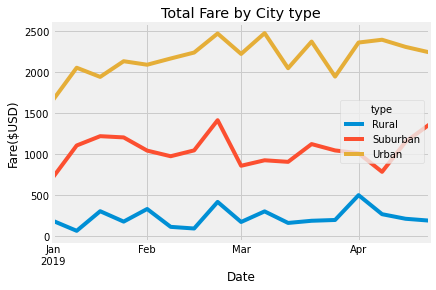

In [255]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style

Fare_by_weeks.plot()
plt.xlabel("Month")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City type")


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("PyBer_Fare_summary.png")
  
plt.show()